In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import scipy.stats as stats
import pandas as pd
from sklearn.metrics import mutual_info_score
from scipy.stats import pearsonr
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("loan_data.csv")

In [4]:
# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [5]:
df.dropna(subset=["OCCUPATION_TYPE"], inplace=True)  # drop null columns

In [6]:
categorical_columns = df[['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE', 'NAME_CONTRACT_TYPE_y',
       'WEEKDAY_APPR_PROCESS_START_y', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE_y', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION']]

In [7]:
for i in categorical_columns:
    df[i] = df[i].fillna(df[i].mode()[0])

In [8]:
# Check for null values in categorical columns
categorical_nulls = df[categorical_cols].isnull().sum()
print("Categorical Null Values:")
print(categorical_nulls)

Categorical Null Values:
NAME_CONTRACT_TYPE_x            0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
NAME_TYPE_SUITE_x               0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
OCCUPATION_TYPE                 0
WEEKDAY_APPR_PROCESS_START_x    0
ORGANIZATION_TYPE               0
FONDKAPREMONT_MODE              0
HOUSETYPE_MODE                  0
WALLSMATERIAL_MODE              0
EMERGENCYSTATE_MODE             0
NAME_CONTRACT_TYPE_y            0
WEEKDAY_APPR_PROCESS_START_y    0
FLAG_LAST_APPL_PER_CONTRACT     0
NAME_CASH_LOAN_PURPOSE          0
NAME_CONTRACT_STATUS            0
NAME_PAYMENT_TYPE               0
CODE_REJECT_REASON              0
NAME_TYPE_SUITE_y               0
NAME_CLIENT_TYPE                0
NAME_GOODS_CATEGORY             0
NAME_PORTFOLIO                  0
NAME_PRODUCT_TYPE               0
CHANNEL_TYPE           

In [9]:
# Calculate Mutual Information for categorical features
mi_scores = []
for feature in categorical_cols:
    mi = mutual_info_score(df[feature], df['TARGET'])
    mi_scores.append(mi)

In [10]:
hybrid_scores = [0.5 * mi for mi in mi_scores]

In [11]:
# Rank categorical features by mutual information scores
ranked_categorical_features = [feature for _, feature in sorted(zip(mi_scores, categorical_cols), reverse=True)]

In [12]:
# Select top N features
N = 10
selected_features = ranked_categorical_features[:N]

print("Selected Features:", selected_features)

Selected Features: ['OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE', 'ORGANIZATION_TYPE', 'PRODUCT_COMBINATION', 'CODE_REJECT_REASON', 'NAME_CONTRACT_STATUS', 'NAME_INCOME_TYPE', 'NAME_YIELD_GROUP', 'CODE_GENDER', 'NAME_GOODS_CATEGORY']


In [13]:
df_1= df[['OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE', 'ORGANIZATION_TYPE', 'PRODUCT_COMBINATION', 'CODE_REJECT_REASON', 'NAME_CONTRACT_STATUS', 'NAME_INCOME_TYPE', 'NAME_YIELD_GROUP', 'CODE_GENDER', 'NAME_GOODS_CATEGORY']]

In [14]:
df_1

,OCCUPATION_TYPE,NAME_EDUCATION_TYPE,ORGANIZATION_TYPE,PRODUCT_COMBINATION,CODE_REJECT_REASON,NAME_CONTRACT_STATUS,NAME_INCOME_TYPE,NAME_YIELD_GROUP,CODE_GENDER,NAME_GOODS_CATEGORY
0,Laborers,Secondary / secondary special,Business Entity Type 3,POS other with interest,XAP,Approved,Working,low_normal,M,Vehicles
1,Core staff,Higher education,School,Cash X-Sell: low,XAP,Approved,State servant,low_normal,F,XNA
2,Core staff,Higher education,School,POS industry with interest,XAP,Approved,State servant,middle,F,Furniture
3,Core staff,Higher education,School,POS household with interest,XAP,Approved,State servant,middle,F,Consumer Electronics
4,Laborers,Secondary / secondary special,Government,POS mobile without interest,XAP,Approved,Working,middle,M,Mobile
...,...,...,...,...,...,...,...,...,...,...
1413696,Laborers,Higher education,Business Entity Type 3,Cash X-Sell: middle,XAP,Approved,Commercial associate,middle,F,XNA
1413697,Laborers,Higher education,Business Entity Type 3,Card Street,HC,Refused,Commercial associate,XNA,F,XNA
1413698,Laborers,Higher education,Business Entity Type 3,Cash Street: low,HC,Refused,Commercial associate,low_normal,F,XNA
1413699,Laborers,Higher education,Business Entity Type 3,Cash X-Sell: low,XAP,Approved,Commercial associate,low_normal,F,XNA


In [15]:
df['NAME_YIELD_GROUP'].unique()

array(['low_normal', 'middle', 'XNA', 'high', 'low_action'], dtype=object)

In [16]:
selected_cat = df_1[['OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE', 'ORGANIZATION_TYPE', 'PRODUCT_COMBINATION', 'CODE_REJECT_REASON', 'NAME_CONTRACT_STATUS', 'NAME_INCOME_TYPE', 'NAME_YIELD_GROUP', 'CODE_GENDER', 'NAME_GOODS_CATEGORY']]

In [17]:
nominal_variable = selected_cat[['OCCUPATION_TYPE','ORGANIZATION_TYPE','PRODUCT_COMBINATION','CODE_REJECT_REASON','NAME_GOODS_CATEGORY','CODE_GENDER']]

In [18]:
ordinal_variable = selected_cat[['NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS','NAME_INCOME_TYPE','NAME_YIELD_GROUP']]

In [19]:
from sklearn.preprocessing import LabelEncoder
def label_encoder(datafarme,column):
  le = LabelEncoder()
  for feature in column:
    datafarme[feature] = le.fit_transform(df[feature])
  return datafarme

In [20]:
label_encoder(df_1,nominal_variable)

C:\Users\logan\AppData\Local\Temp\ipykernel_8924\571510498.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datafarme[feature] = le.fit_transform(df[feature])
C:\Users\logan\AppData\Local\Temp\ipykernel_8924\571510498.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datafarme[feature] = le.fit_transform(df[feature])
C:\Users\logan\AppData\Local\Temp\ipykernel_8924\571510498.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,OCCUPATION_TYPE,NAME_EDUCATION_TYPE,ORGANIZATION_TYPE,PRODUCT_COMBINATION,CODE_REJECT_REASON,NAME_CONTRACT_STATUS,NAME_INCOME_TYPE,NAME_YIELD_GROUP,CODE_GENDER,NAME_GOODS_CATEGORY
0,8,Secondary / secondary special,5,15,7,Approved,Working,low_normal,1,24
1,3,Higher education,39,7,7,Approved,State servant,low_normal,0,26
2,3,Higher education,39,11,7,Approved,State servant,middle,0,11
3,3,Higher education,39,9,7,Approved,State servant,middle,0,7
4,8,Secondary / secondary special,11,14,7,Approved,Working,middle,1,18
...,...,...,...,...,...,...,...,...,...,...
1413696,8,Higher education,5,8,7,Approved,Commercial associate,middle,0,26
1413697,8,Higher education,5,0,1,Refused,Commercial associate,XNA,0,26
1413698,8,Higher education,5,4,1,Refused,Commercial associate,low_normal,0,26
1413699,8,Higher education,5,7,7,Approved,Commercial associate,low_normal,0,26


In [21]:
df_1['NAME_YIELD_GROUP'].unique()

array(['low_normal', 'middle', 'XNA', 'high', 'low_action'], dtype=object)

In [22]:
label_encoder(df_1,ordinal_variable)

C:\Users\logan\AppData\Local\Temp\ipykernel_8924\571510498.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datafarme[feature] = le.fit_transform(df[feature])
C:\Users\logan\AppData\Local\Temp\ipykernel_8924\571510498.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datafarme[feature] = le.fit_transform(df[feature])
C:\Users\logan\AppData\Local\Temp\ipykernel_8924\571510498.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,OCCUPATION_TYPE,NAME_EDUCATION_TYPE,ORGANIZATION_TYPE,PRODUCT_COMBINATION,CODE_REJECT_REASON,NAME_CONTRACT_STATUS,NAME_INCOME_TYPE,NAME_YIELD_GROUP,CODE_GENDER,NAME_GOODS_CATEGORY
0,8,4,5,15,7,0,5,3,1,24
1,3,1,39,7,7,0,3,3,0,26
2,3,1,39,11,7,0,3,4,0,11
3,3,1,39,9,7,0,3,4,0,7
4,8,4,11,14,7,0,5,4,1,18
...,...,...,...,...,...,...,...,...,...,...
1413696,8,1,5,8,7,0,0,4,0,26
1413697,8,1,5,0,1,2,0,0,0,26
1413698,8,1,5,4,1,2,0,3,0,26
1413699,8,1,5,7,7,0,0,3,0,26


<Axes: title={'center': 'Correlation Heatmap'}>

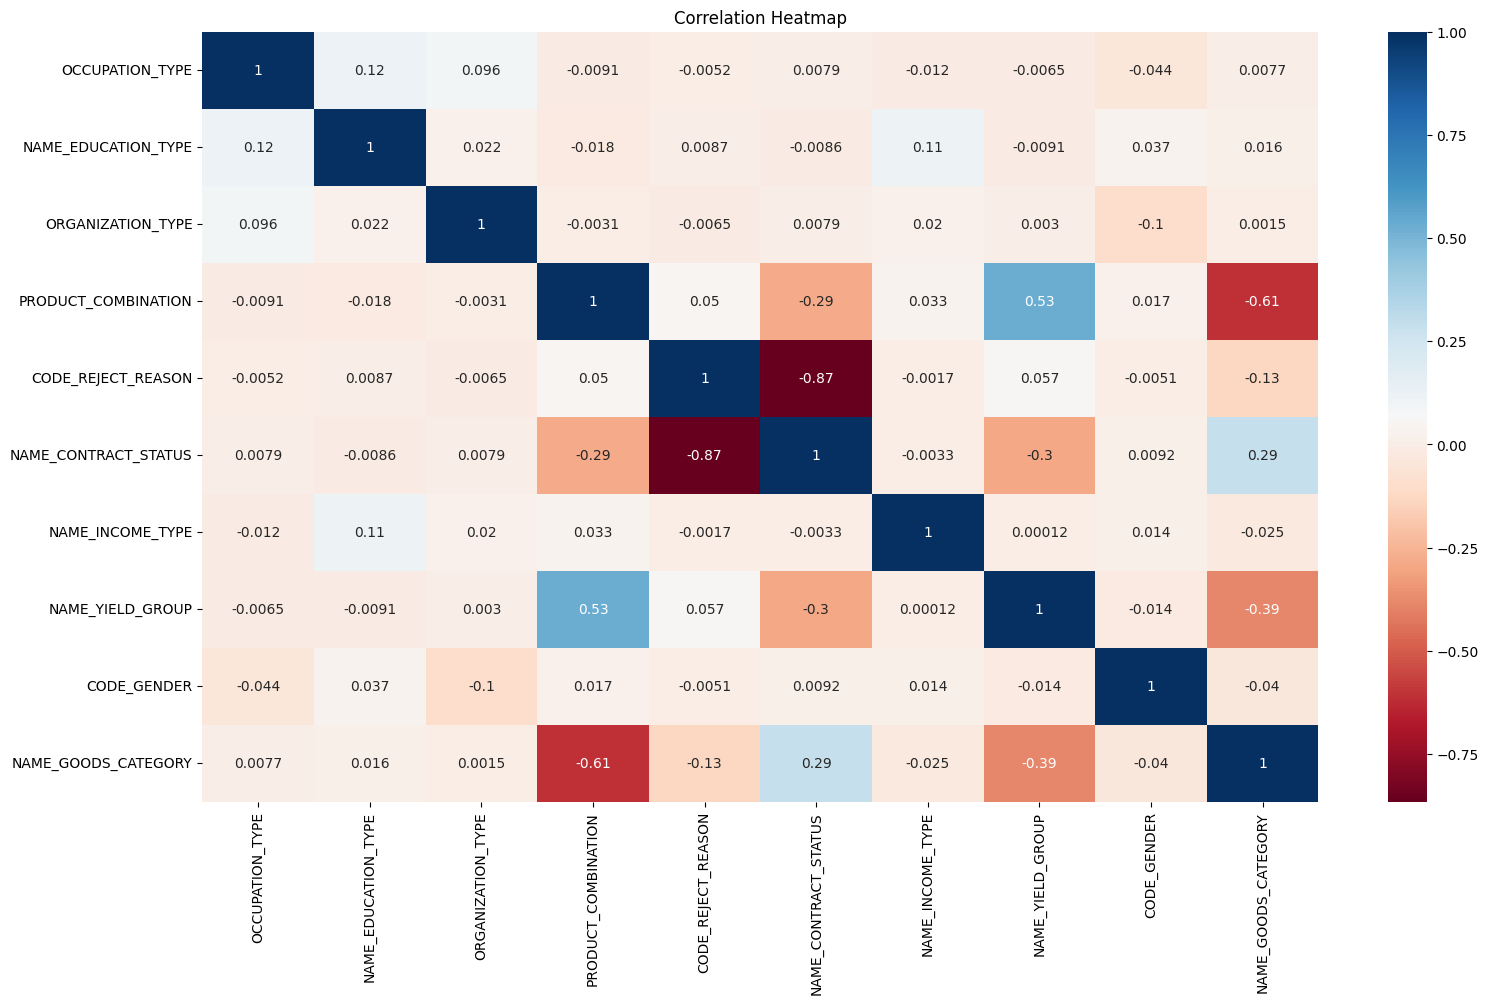

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

corrMatrix = df_1.corr()
plt.figure(figsize=(18, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix, 
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu', 
    annot=True
)

In [25]:
import scipy.stats as stats

# Initialize an empty dictionary to store p-values
p_values = {}

# Iterate over each pair of columns
for col1 in df_1.columns:
    for col2 in df_1.columns:
        if col1 != col2:  
            # Calculate correlation coefficient and p-value
            r, p = stats.pearsonr(df_1[col1], df_1[col2])
            # Store p-value in the dictionary
            p_values[(col1, col2)] = p

# Print p-values
print(p_values)

{('OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE'): 0.0, ('OCCUPATION_TYPE', 'ORGANIZATION_TYPE'): 0.0, ('OCCUPATION_TYPE', 'PRODUCT_COMBINATION'): 4.3016471966436256e-19, ('OCCUPATION_TYPE', 'CODE_REJECT_REASON'): 4.6321314995995373e-07, ('OCCUPATION_TYPE', 'NAME_CONTRACT_STATUS'): 1.3096376471774356e-14, ('OCCUPATION_TYPE', 'NAME_INCOME_TYPE'): 4.646486486437263e-31, ('OCCUPATION_TYPE', 'NAME_YIELD_GROUP'): 1.8547551541705476e-10, ('OCCUPATION_TYPE', 'CODE_GENDER'): 0.0, ('OCCUPATION_TYPE', 'NAME_GOODS_CATEGORY'): 3.913419154805857e-14, ('NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE'): 0.0, ('NAME_EDUCATION_TYPE', 'ORGANIZATION_TYPE'): 1.4920567751330005e-100, ('NAME_EDUCATION_TYPE', 'PRODUCT_COMBINATION'): 1.2539572155355148e-68, ('NAME_EDUCATION_TYPE', 'CODE_REJECT_REASON'): 2.6334515788391645e-17, ('NAME_EDUCATION_TYPE', 'NAME_CONTRACT_STATUS'): 5.644871660732067e-17, ('NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE'): 0.0, ('NAME_EDUCATION_TYPE', 'NAME_YIELD_GROUP'): 4.913042216461765e-19, ('NAME_ED

In [26]:
print("\nNumerical Columns:")
print(numerical_cols)


Numerical Columns:
Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', length=126)


In [27]:
for i in numerical_cols:
    df[i] = df[i].fillna(df[i].mean())

In [28]:
# Check for null values in numerical columns
numerical_nulls = df[numerical_cols].isnull().sum().head(50)
print("Numerical Null Values:")
print(numerical_nulls)

Numerical Null Values:
SK_ID_CURR                      0
TARGET                          0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT_x                    0
AMT_ANNUITY_x                   0
AMT_GOODS_PRICE_x               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OWN_CAR_AGE                     0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
HOUR_APPR_PROCESS_START_x       0
REG_REGION_NOT_LIVE_REGION      0
REG_REGION_NOT_WORK_REGION      0
LIVE_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_LIVE_CITY          0
REG_CITY_NOT_WORK_CITY          0
LIVE_CITY_NOT_WORK_CITY  

In [29]:
# Calculate correlation coefficients for continuous features(identify strength and direction b/w two con variable)
corr_coeffs = []
for feature in numerical_cols:
    corr, _ = pearsonr(df[feature], df['TARGET'])
    corr_coeffs.append(corr)

C:\Users\logan\AppData\Local\Temp\ipykernel_8924\3648278418.py:4: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(df[feature], df['TARGET'])


In [30]:
hybrid_scores = [0.5 * corr for corr in corr_coeffs]

In [31]:
# Rank categorical features by mutual information scores
ranked_continuous_features = [feature for _, feature in sorted(zip(corr_coeffs, numerical_cols), reverse=True)]

In [32]:
# Select top N features
N = 10
selected_features = ranked_continuous_features[:N]

print("Selected Features:", selected_features)

Selected Features: ['TARGET', 'FLAG_MOBIL', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_DECISION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY']


In [33]:
df1 = df[['TARGET','AMT_INCOME_TOTAL','DAYS_BIRTH', 'FLAG_MOBIL', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 'FLAG_EMP_PHONE', 'DAYS_REGISTRATION']]

In [34]:
df1['DAYS_BIRTH'] = df1['DAYS_BIRTH'].abs()  # making absolute values
df1["DAYS_LAST_PHONE_CHANGE"]=df1["DAYS_LAST_PHONE_CHANGE"].abs()
df1['DAYS_ID_PUBLISH'] = df1['DAYS_ID_PUBLISH'].abs()  # making absolute values
df1["DAYS_REGISTRATION"]=df1["DAYS_REGISTRATION"].abs()

C:\Users\logan\AppData\Local\Temp\ipykernel_8924\3438837914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['DAYS_BIRTH'] = df1['DAYS_BIRTH'].abs()  # making absolute values
C:\Users\logan\AppData\Local\Temp\ipykernel_8924\3438837914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["DAYS_LAST_PHONE_CHANGE"]=df1["DAYS_LAST_PHONE_CHANGE"].abs()
C:\Users\logan\AppData\Local\Temp\ipykernel_8924\3438837914.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

C:\Users\logan\AppData\Local\Temp\ipykernel_8924\1313727624.py:24: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p = stats.pearsonr(df1[col1], df1[col2])


{('TARGET', 'AMT_INCOME_TOTAL'): 3.7747905346364835e-05, ('TARGET', 'DAYS_BIRTH'): 0.0, ('TARGET', 'FLAG_MOBIL'): nan, ('TARGET', 'DAYS_LAST_PHONE_CHANGE'): 0.0, ('TARGET', 'REGION_RATING_CLIENT_W_CITY'): 0.0, ('TARGET', 'REGION_RATING_CLIENT'): 0.0, ('TARGET', 'DAYS_ID_PUBLISH'): 4.494621228414988e-306, ('TARGET', 'REG_CITY_NOT_WORK_CITY'): 0.0, ('TARGET', 'FLAG_EMP_PHONE'): 0.36271441803959886, ('TARGET', 'DAYS_REGISTRATION'): 1.3726463719721527e-291, ('AMT_INCOME_TOTAL', 'TARGET'): 3.7747905346364835e-05, ('AMT_INCOME_TOTAL', 'DAYS_BIRTH'): 7.749939356332906e-187, ('AMT_INCOME_TOTAL', 'FLAG_MOBIL'): nan, ('AMT_INCOME_TOTAL', 'DAYS_LAST_PHONE_CHANGE'): 8.694519851916624e-105, ('AMT_INCOME_TOTAL', 'REGION_RATING_CLIENT_W_CITY'): 0.0, ('AMT_INCOME_TOTAL', 'REGION_RATING_CLIENT'): 0.0, ('AMT_INCOME_TOTAL', 'DAYS_ID_PUBLISH'): 3.740959447045868e-15, ('AMT_INCOME_TOTAL', 'REG_CITY_NOT_WORK_CITY'): 8.024484094752347e-20, ('AMT_INCOME_TOTAL', 'FLAG_EMP_PHONE'): 0.6036704167145582, ('AMT_INC

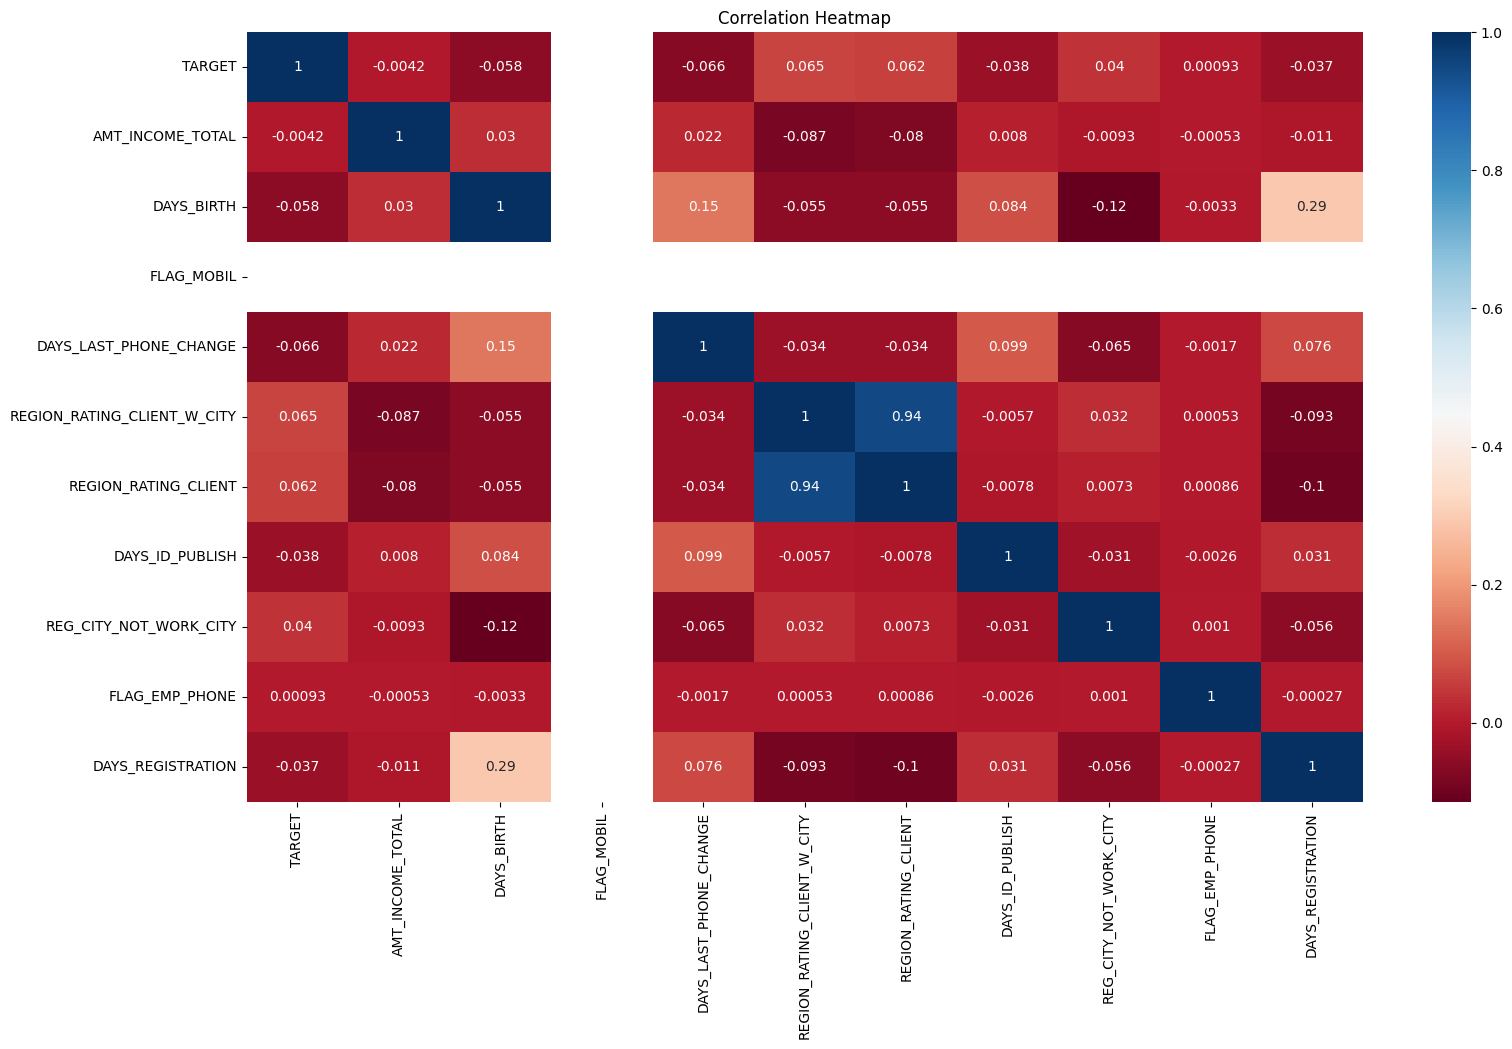

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

corrMatrix = df1.corr()
plt.figure(figsize=(18, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix, 
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu', 
    annot=True
)
import scipy.stats as stats

# Initialize an empty dictionary to store p-values
p_values = {}

# Iterate over each pair of columns
for col1 in df1.columns:
    for col2 in df1.columns:
        if col1 != col2:  # Avoid calculating correlation for the same column
            # Calculate correlation coefficient and p-value
            r, p = stats.pearsonr(df1[col1], df1[col2])
            # Store p-value in the dictionary
            p_values[(col1, col2)] = p

# Print p-values
print(p_values)

In [36]:
df_modified = pd.concat([df_1,df1],axis=1)

In [37]:
df_modified

,OCCUPATION_TYPE,NAME_EDUCATION_TYPE,ORGANIZATION_TYPE,PRODUCT_COMBINATION,CODE_REJECT_REASON,NAME_CONTRACT_STATUS,NAME_INCOME_TYPE,NAME_YIELD_GROUP,CODE_GENDER,NAME_GOODS_CATEGORY,...,AMT_INCOME_TOTAL,DAYS_BIRTH,FLAG_MOBIL,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,DAYS_REGISTRATION
0,8,4,5,15,7,0,5,3,1,24,...,202500.0,9461,1,1134.0,2,2,2120,0,1,3648.0
1,3,1,39,7,7,0,3,3,0,26,...,270000.0,16765,1,828.0,1,1,291,0,1,1186.0
2,3,1,39,11,7,0,3,4,0,11,...,270000.0,16765,1,828.0,1,1,291,0,1,1186.0
3,3,1,39,9,7,0,3,4,0,7,...,270000.0,16765,1,828.0,1,1,291,0,1,1186.0
4,8,4,11,14,7,0,5,4,1,18,...,67500.0,19046,1,815.0,2,2,2531,0,1,4260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,8,1,5,8,7,0,0,4,0,26,...,157500.0,16856,1,787.0,1,1,410,1,1,5128.0
1413697,8,1,5,0,1,2,0,0,0,26,...,157500.0,16856,1,787.0,1,1,410,1,1,5128.0
1413698,8,1,5,4,1,2,0,3,0,26,...,157500.0,16856,1,787.0,1,1,410,1,1,5128.0
1413699,8,1,5,7,7,0,0,3,0,26,...,157500.0,16856,1,787.0,1,1,410,1,1,5128.0


In [38]:
# detecting the skewed columns using plot

def skewplot(df, column):
    plt.figure(figsize=(10, 4))

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(df[column])
    plt.title("Box plot for " + column)

    # Violin plot
    plt.subplot(1, 3, 3)
    sns.violinplot(df[column])
    plt.title("Violin plot for " + column)

    plt.tight_layout()
    plt.show()

In [39]:
df_modified.columns

Index(['OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE', 'ORGANIZATION_TYPE',
       'PRODUCT_COMBINATION', 'CODE_REJECT_REASON', 'NAME_CONTRACT_STATUS',
       'NAME_INCOME_TYPE', 'NAME_YIELD_GROUP', 'CODE_GENDER',
       'NAME_GOODS_CATEGORY', 'TARGET', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH',
       'FLAG_MOBIL', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY',
       'FLAG_EMP_PHONE', 'DAYS_REGISTRATION'],
      dtype='object')

In [40]:
df_modified['DAYS_REGISTRATION'].unique()

array([ 3648.,  1186.,  4260., ..., 12316., 14083., 12372.])

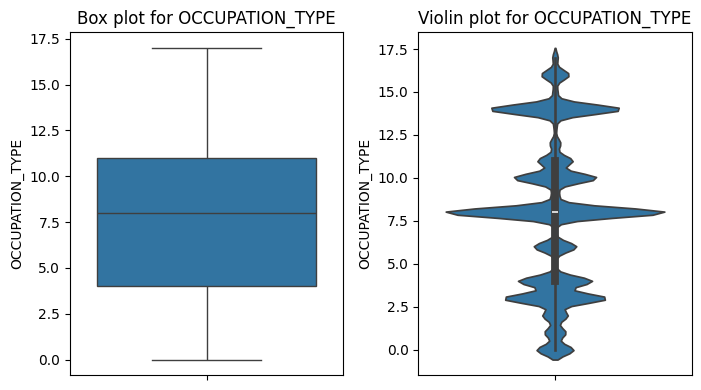

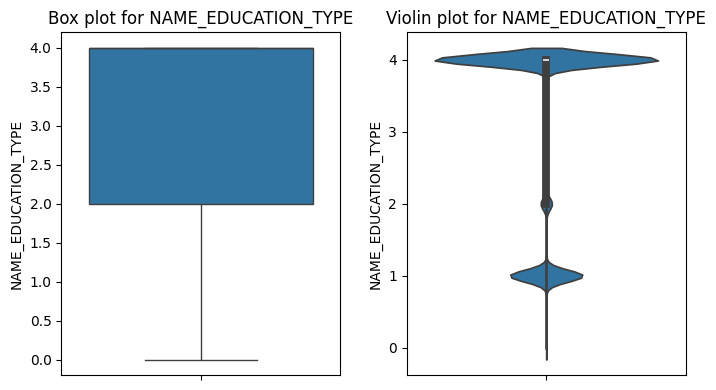

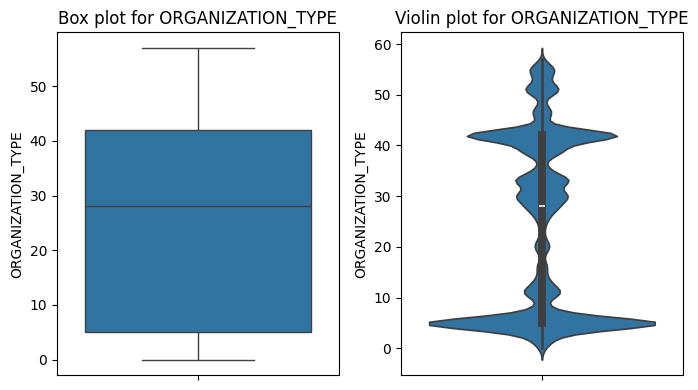

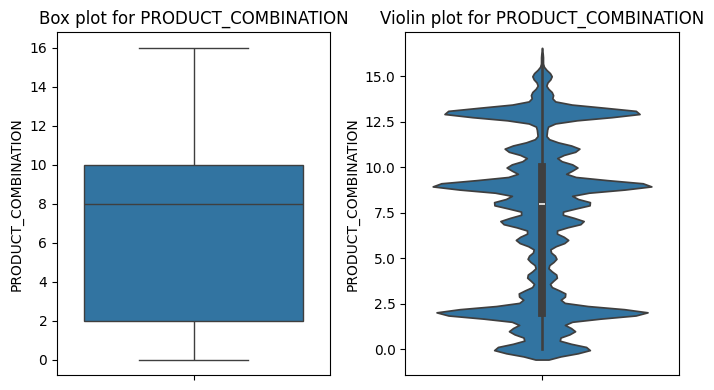

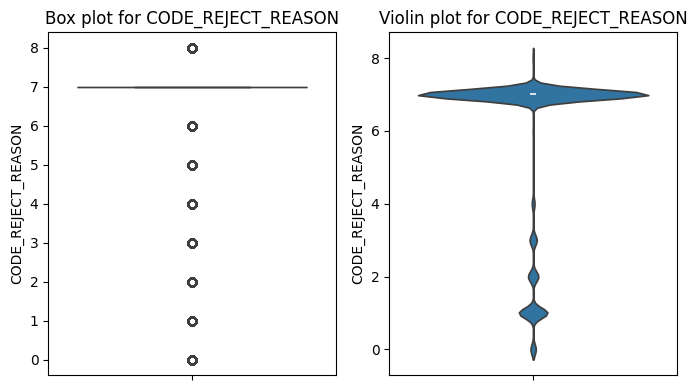

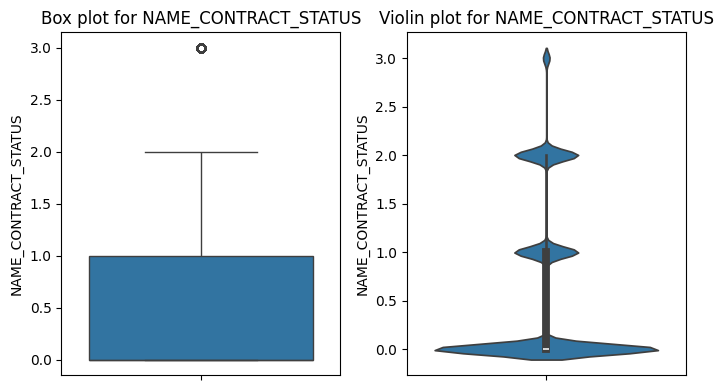

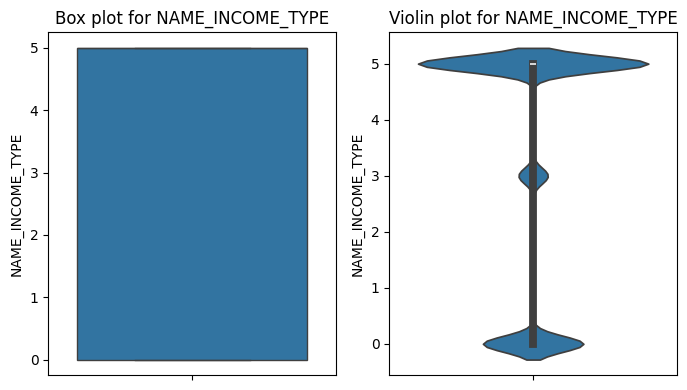

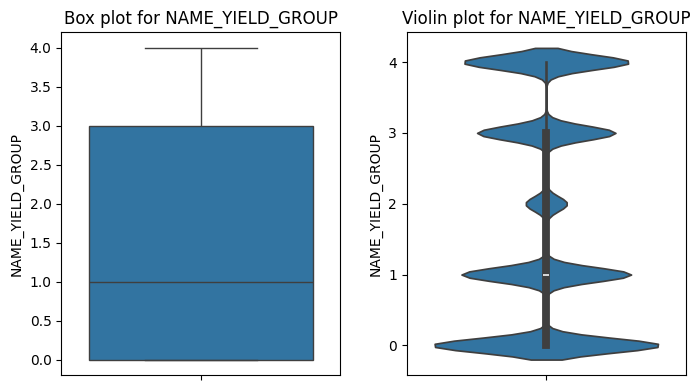

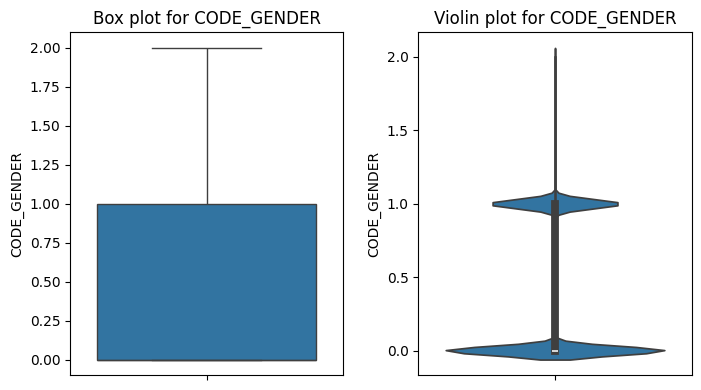

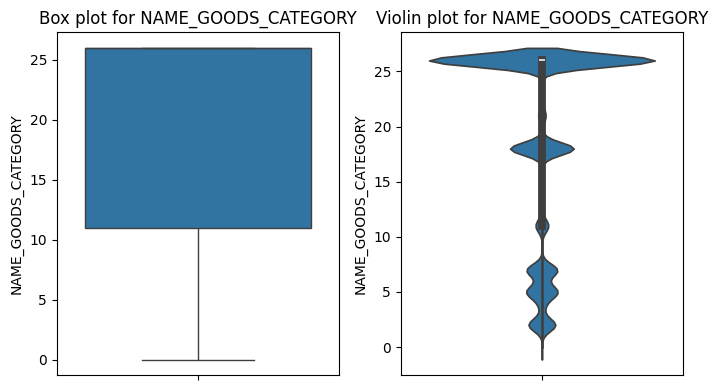

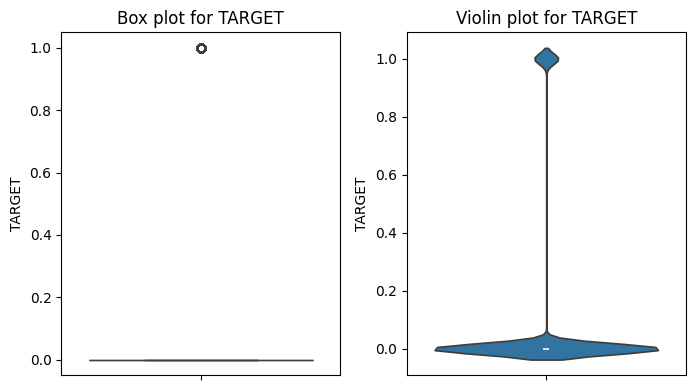

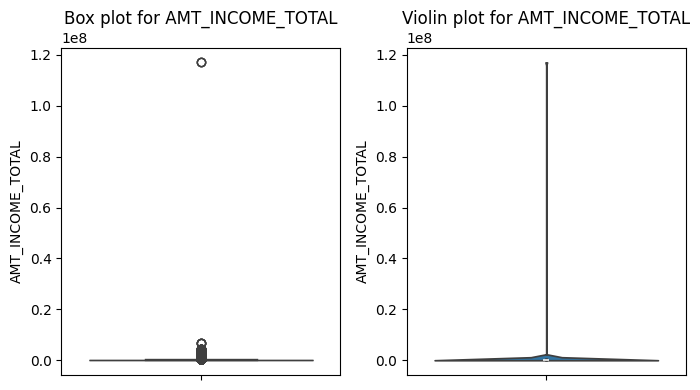

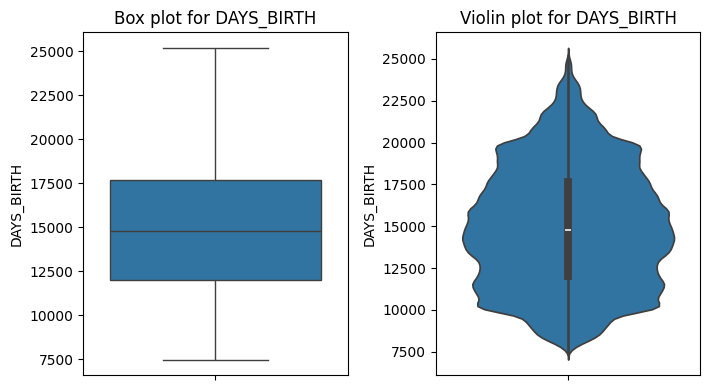

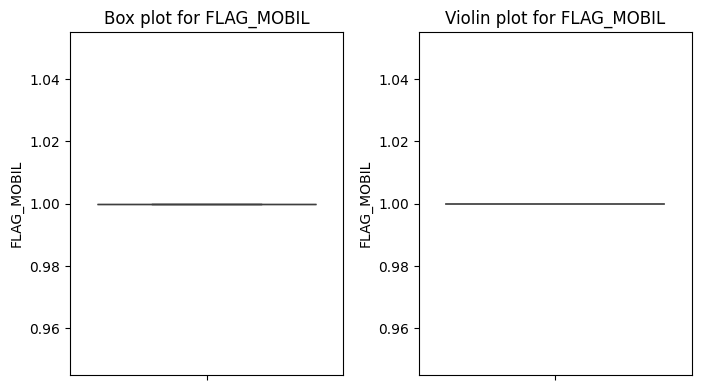

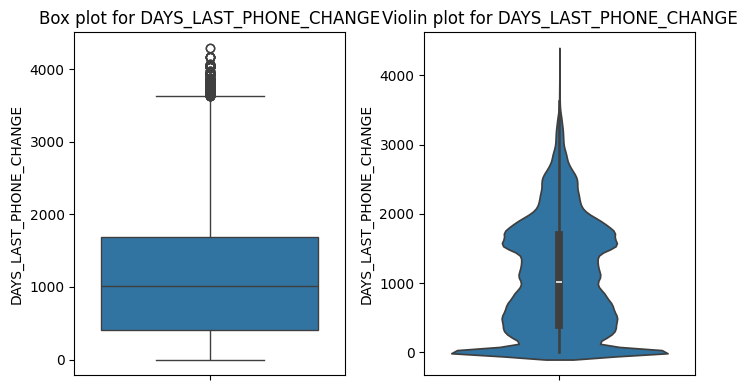

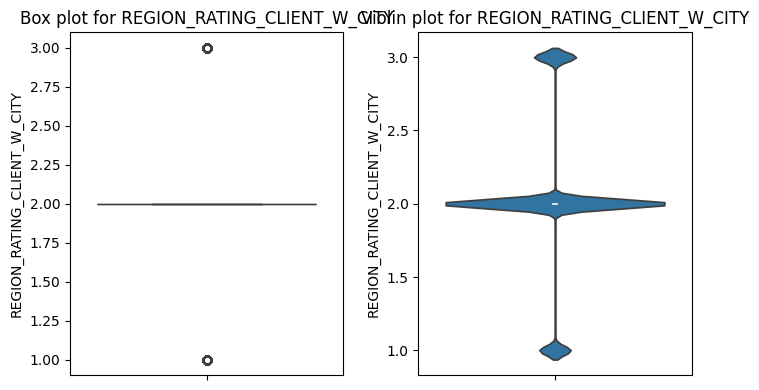

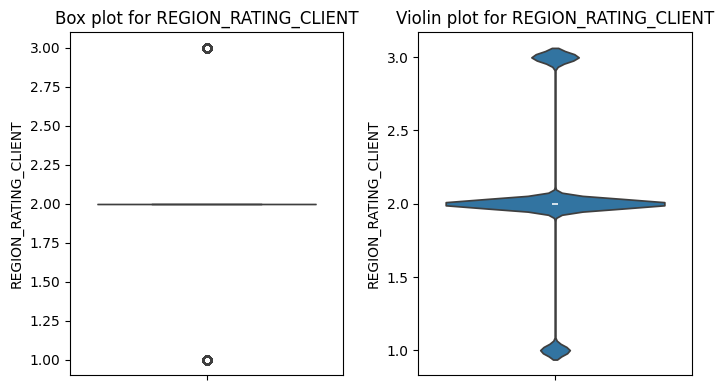

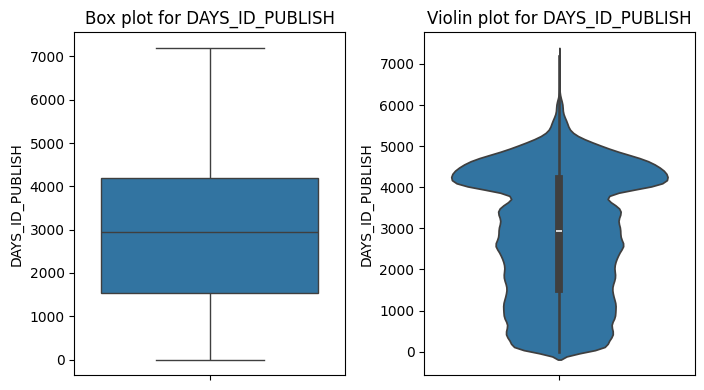

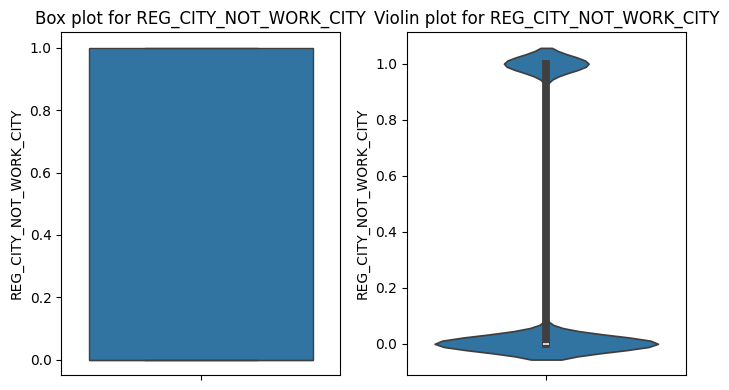

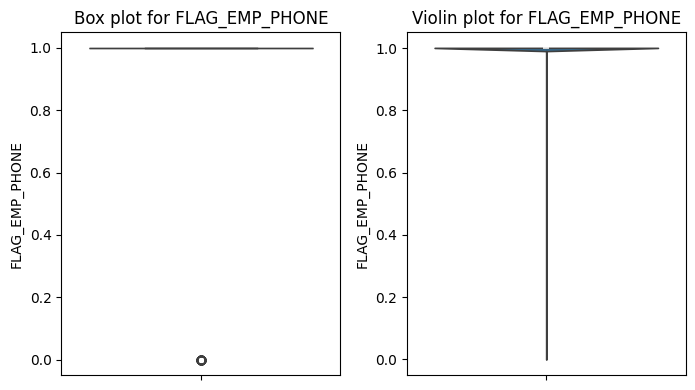

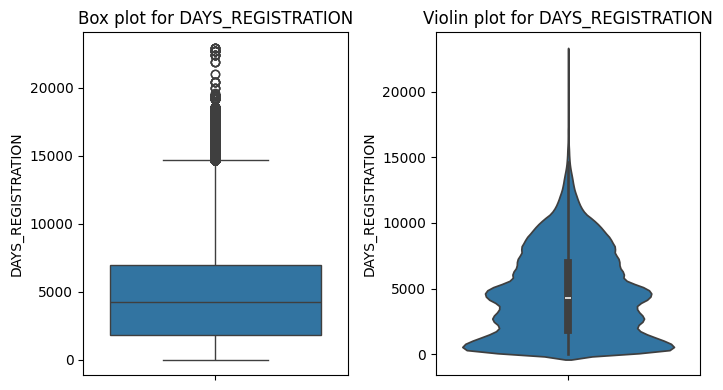

In [41]:
skewed_columns= ['OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE', 'ORGANIZATION_TYPE',
       'PRODUCT_COMBINATION', 'CODE_REJECT_REASON', 'NAME_CONTRACT_STATUS',
       'NAME_INCOME_TYPE', 'NAME_YIELD_GROUP', 'CODE_GENDER',
       'NAME_GOODS_CATEGORY', 'TARGET', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH',
       'FLAG_MOBIL', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY',
       'FLAG_EMP_PHONE', 'DAYS_REGISTRATION']
 

for column in skewed_columns:
    skewplot(df_modified, column)

In [42]:
import numpy as np

# Apply square root transformation to the specified columns


df_modified['NAME_EDUCATION_TYPE_log'] = np.log(df_modified['NAME_EDUCATION_TYPE'])
df_modified["PRODUCT_COMBINATION_log"] = np.log(df_modified["PRODUCT_COMBINATION"])
df_modified["CODE_REJECT_REASON_log"] = np.log(df_modified["CODE_REJECT_REASON"])
df_modified["NAME_INCOME_TYPE_log"] = np.log(df_modified["NAME_INCOME_TYPE"])
df_modified["NAME_GOODS_CATEGORY_log"] = np.log(df_modified["NAME_GOODS_CATEGORY"])
df_modified["AMT_INCOME_TOTAL_log"] = np.log(df_modified["AMT_INCOME_TOTAL"])
df_modified["DAYS_LAST_PHONE_CHANGE_log"] = np.log(df_modified["DAYS_LAST_PHONE_CHANGE"])
df_modified["DAYS_ID_PUBLISH_log"] = np.log(df_modified["DAYS_ID_PUBLISH"])
df_modified["DAYS_REGISTRATION_log"] = np.log(df_modified["DAYS_REGISTRATION"])

e:\project\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
e:\project\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
e:\project\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
e:\project\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
e:\project\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
e:\project\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **

In [43]:
df_modified.columns

Index(['OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE', 'ORGANIZATION_TYPE',
       'PRODUCT_COMBINATION', 'CODE_REJECT_REASON', 'NAME_CONTRACT_STATUS',
       'NAME_INCOME_TYPE', 'NAME_YIELD_GROUP', 'CODE_GENDER',
       'NAME_GOODS_CATEGORY', 'TARGET', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH',
       'FLAG_MOBIL', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY',
       'FLAG_EMP_PHONE', 'DAYS_REGISTRATION', 'NAME_EDUCATION_TYPE_log',
       'PRODUCT_COMBINATION_log', 'CODE_REJECT_REASON_log',
       'NAME_INCOME_TYPE_log', 'NAME_GOODS_CATEGORY_log',
       'AMT_INCOME_TOTAL_log', 'DAYS_LAST_PHONE_CHANGE_log',
       'DAYS_ID_PUBLISH_log', 'DAYS_REGISTRATION_log'],
      dtype='object')

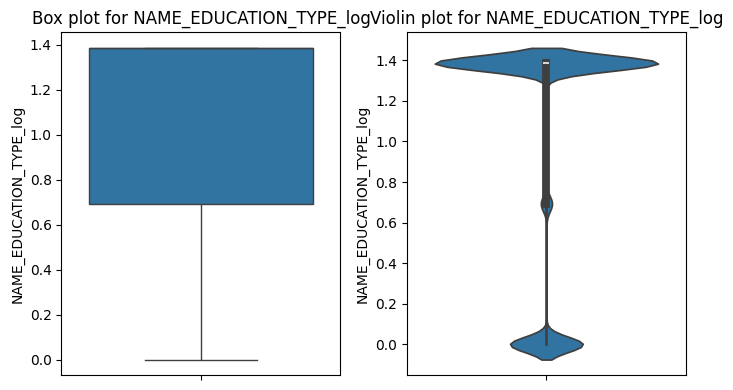

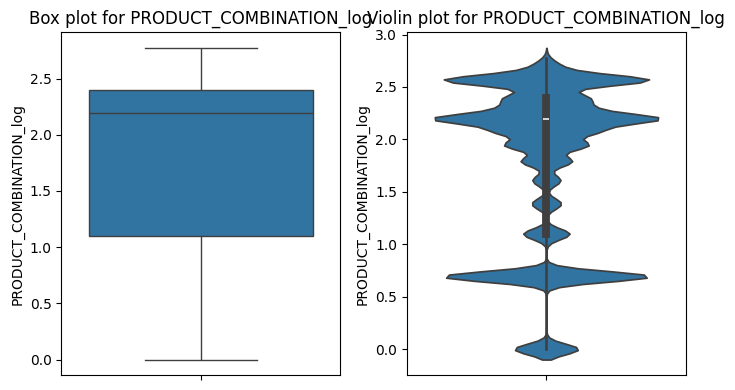

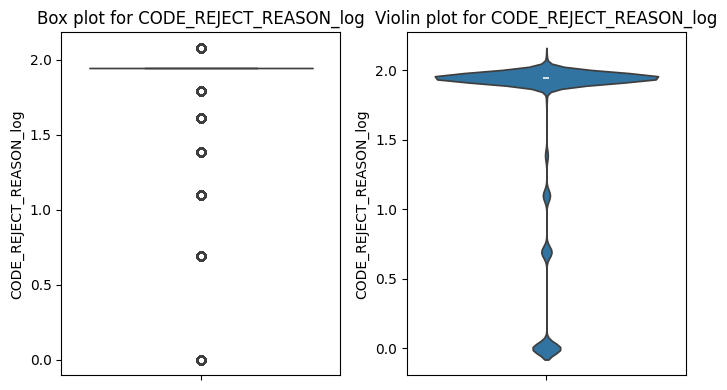

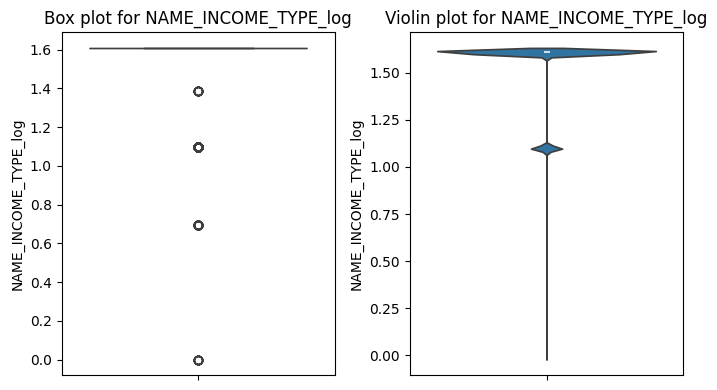

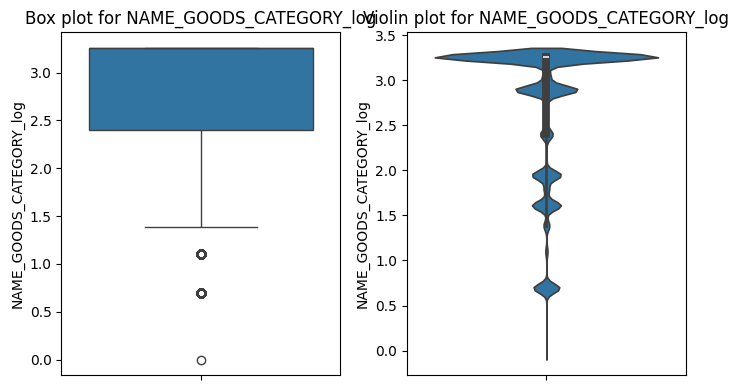

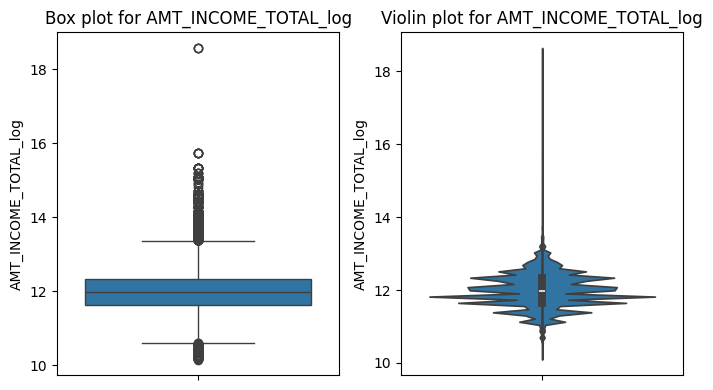

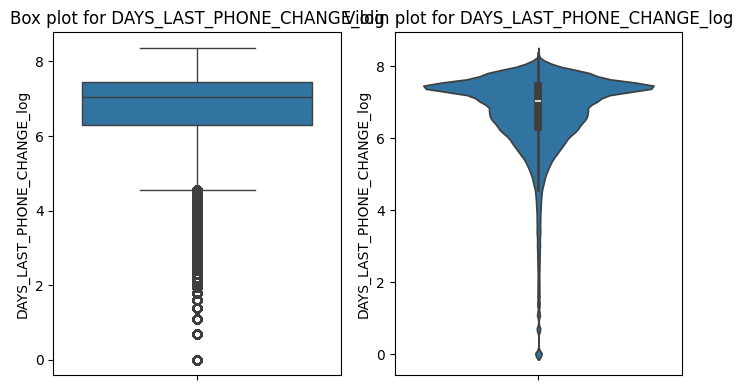

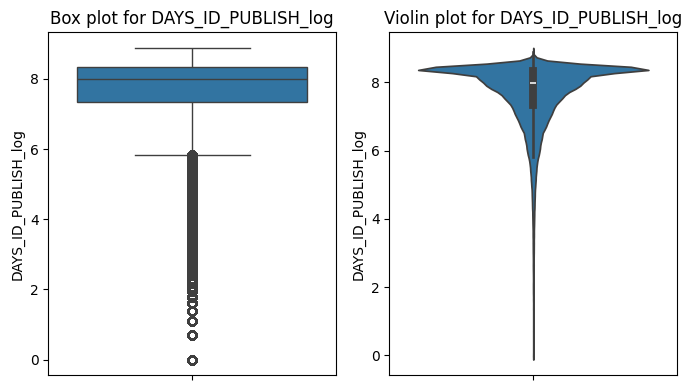

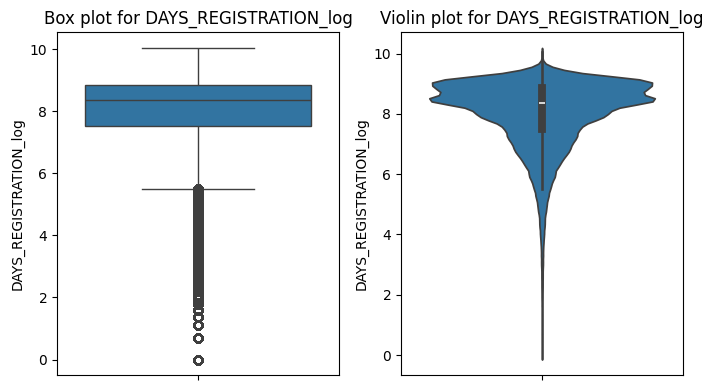

In [44]:
log_column = ['NAME_EDUCATION_TYPE_log','PRODUCT_COMBINATION_log','CODE_REJECT_REASON_log',
              'NAME_INCOME_TYPE_log','NAME_GOODS_CATEGORY_log','AMT_INCOME_TOTAL_log',
              'DAYS_LAST_PHONE_CHANGE_log','DAYS_ID_PUBLISH_log','DAYS_REGISTRATION_log']
for i in log_column:
  skewplot(df_modified,i)

In [45]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)
  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [46]:
outlier_columns= ['CODE_REJECT_REASON','NAME_GOODS_CATEGORY','NAME_INCOME_TYPE','AMT_INCOME_TOTAL','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','DAYS_REGISTRATION']

for i in outlier_columns:
  outlier(df_modified,i)

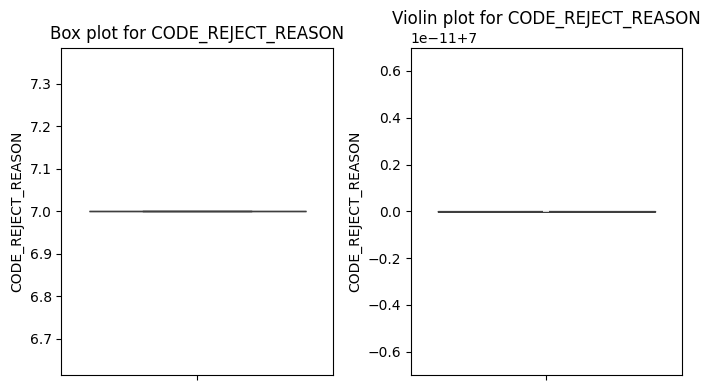

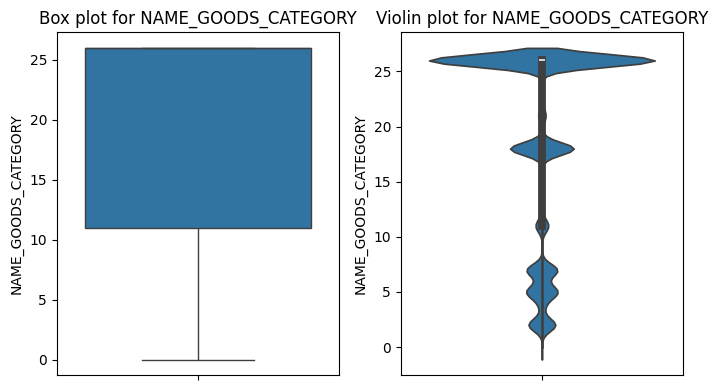

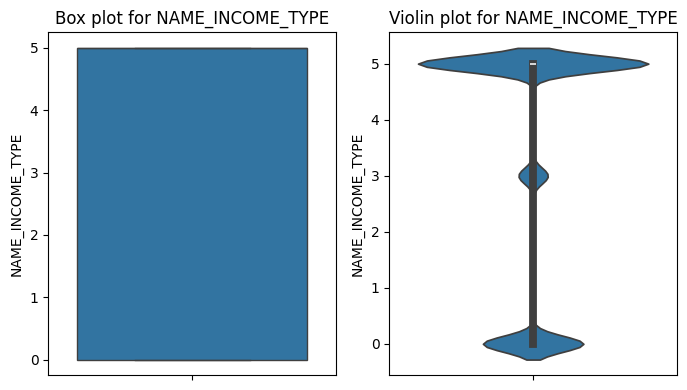

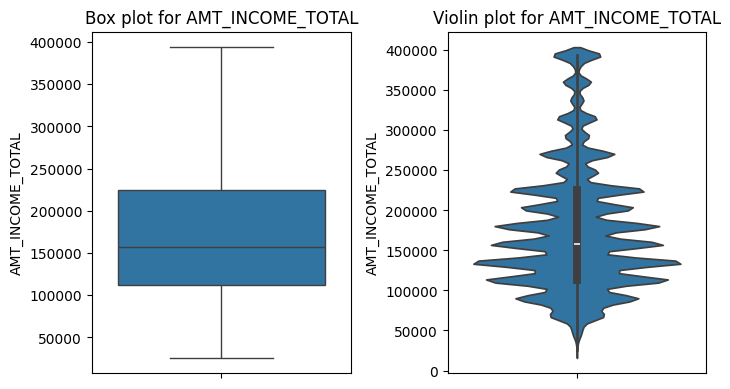

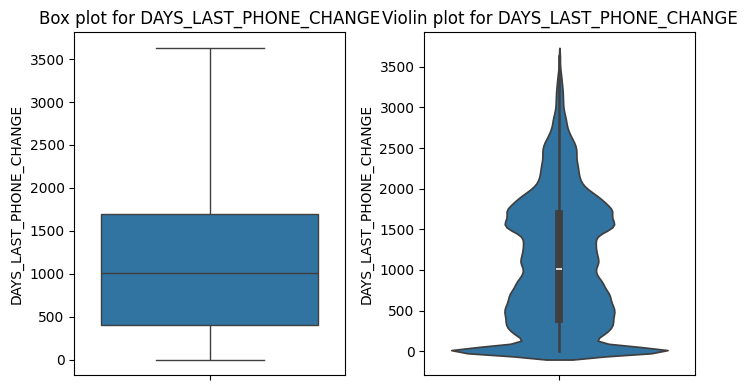

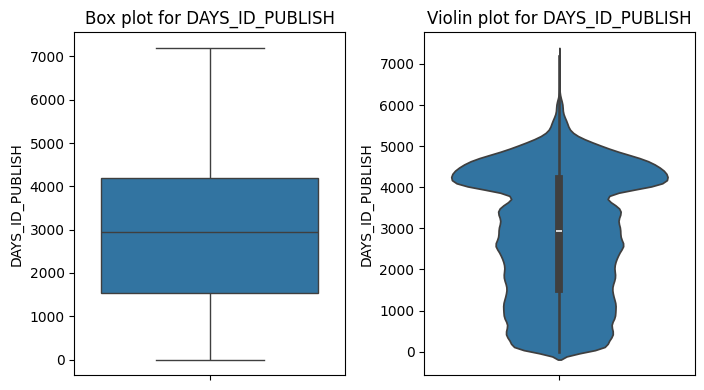

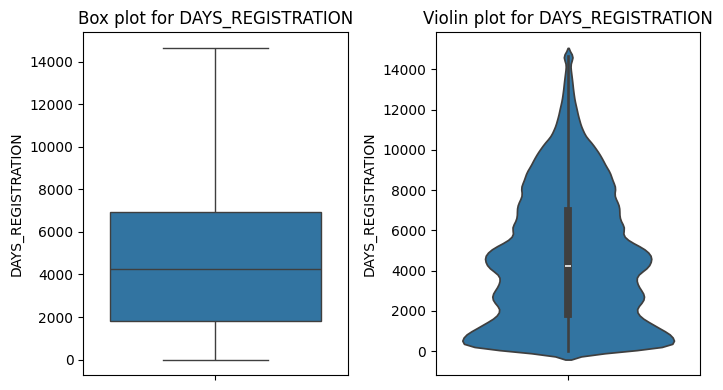

In [47]:
for i in outlier_columns:
  skewplot(df_modified,i)

In [48]:
df_modified[['DAYS_REGISTRATION','TARGET']]

,DAYS_REGISTRATION,TARGET
0,3648.0,1
1,1186.0,0
2,1186.0,0
3,1186.0,0
4,4260.0,0
...,...,...
1413696,5128.0,0
1413697,5128.0,0
1413698,5128.0,0
1413699,5128.0,0


In [49]:
df_modified

,OCCUPATION_TYPE,NAME_EDUCATION_TYPE,ORGANIZATION_TYPE,PRODUCT_COMBINATION,CODE_REJECT_REASON,NAME_CONTRACT_STATUS,NAME_INCOME_TYPE,NAME_YIELD_GROUP,CODE_GENDER,NAME_GOODS_CATEGORY,...,DAYS_REGISTRATION,NAME_EDUCATION_TYPE_log,PRODUCT_COMBINATION_log,CODE_REJECT_REASON_log,NAME_INCOME_TYPE_log,NAME_GOODS_CATEGORY_log,AMT_INCOME_TOTAL_log,DAYS_LAST_PHONE_CHANGE_log,DAYS_ID_PUBLISH_log,DAYS_REGISTRATION_log
0,8,4,5,15,7,0,5,3,1,24,...,3648.0,1.386294,2.708050,1.94591,1.609438,3.178054,12.218495,7.033506,7.659171,8.201934
1,3,1,39,7,7,0,3,3,0,26,...,1186.0,0.000000,1.945910,1.94591,1.098612,3.258097,12.506177,6.719013,5.673323,7.078342
2,3,1,39,11,7,0,3,4,0,11,...,1186.0,0.000000,2.397895,1.94591,1.098612,2.397895,12.506177,6.719013,5.673323,7.078342
3,3,1,39,9,7,0,3,4,0,7,...,1186.0,0.000000,2.197225,1.94591,1.098612,1.945910,12.506177,6.719013,5.673323,7.078342
4,8,4,11,14,7,0,5,4,1,18,...,4260.0,1.386294,2.639057,1.94591,1.609438,2.890372,11.119883,6.703188,7.836370,8.357024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,8,1,5,8,7,0,0,4,0,26,...,5128.0,0.000000,2.079442,1.94591,-inf,3.258097,11.967181,6.668228,6.016157,8.542471
1413697,8,1,5,0,7,2,0,0,0,26,...,5128.0,0.000000,-inf,0.00000,-inf,3.258097,11.967181,6.668228,6.016157,8.542471
1413698,8,1,5,4,7,2,0,3,0,26,...,5128.0,0.000000,1.386294,0.00000,-inf,3.258097,11.967181,6.668228,6.016157,8.542471
1413699,8,1,5,7,7,0,0,3,0,26,...,5128.0,0.000000,1.945910,1.94591,-inf,3.258097,11.967181,6.668228,6.016157,8.542471


In [50]:
df_modified_1 = df_modified.copy()

In [51]:
df_modified_1.columns

Index(['OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE', 'ORGANIZATION_TYPE',
       'PRODUCT_COMBINATION', 'CODE_REJECT_REASON', 'NAME_CONTRACT_STATUS',
       'NAME_INCOME_TYPE', 'NAME_YIELD_GROUP', 'CODE_GENDER',
       'NAME_GOODS_CATEGORY', 'TARGET', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH',
       'FLAG_MOBIL', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY',
       'FLAG_EMP_PHONE', 'DAYS_REGISTRATION', 'NAME_EDUCATION_TYPE_log',
       'PRODUCT_COMBINATION_log', 'CODE_REJECT_REASON_log',
       'NAME_INCOME_TYPE_log', 'NAME_GOODS_CATEGORY_log',
       'AMT_INCOME_TOTAL_log', 'DAYS_LAST_PHONE_CHANGE_log',
       'DAYS_ID_PUBLISH_log', 'DAYS_REGISTRATION_log'],
      dtype='object')

In [52]:
df_modified_1.to_csv("df_new.csv")

In [53]:
df_2 = pd.read_csv("df_new.csv")

# Feature Engineering

In [54]:
# 1. Extract age from DAYS_BIRTH
df_2['AGE'] = df_2['DAYS_BIRTH'] / -365

In [55]:
df_2['AGE'] = df_2['AGE'].abs()

In [56]:
df_2['AGE'].isnull().sum()

0

In [57]:
df_2['INCOME_PA'] = df_2['AMT_INCOME_TOTAL']*12

In [58]:
# Group by income_type and income_percentile_bin
grouped_df = df_2.groupby(['NAME_INCOME_TYPE', 'INCOME_PA']).size().reset_index(name='count')

# Print the grouped data
print(grouped_df)


      NAME_INCOME_TYPE  INCOME_PA  count
0                    0   318600.0      2
1                    0   324000.0      4
2                    0   351000.0      1
3                    0   378000.0     27
4                    0   405000.0      1
...                ...        ...    ...
1758                 5  4590000.0   1730
1759                 5  4637682.0     21
1760                 5  4644000.0    195
1761                 5  4698000.0    143
1762                 5  4725000.0  11172

[1763 rows x 3 columns]


In [59]:
grouped_df.max()

NAME_INCOME_TYPE          5.0
INCOME_PA           4725000.0
count                 75818.0
dtype: float64

In [60]:
df_2['INCOME_PA'].max()

4725000.0

In [61]:
df_2['CLIENT_RATING'] = pd.cut(df_2['REGION_RATING_CLIENT_W_CITY'], bins=[0,1,2,3], labels=['Low', 'Medium', 'High'])

In [62]:
df_2['CLIENT_RATING_W_CITY'] =  df_2['CLIENT_RATING'].map({'Low': 1, 'Medium': 2, 'High': 3})

In [63]:
df_2['DAYS_LAST_PHONE_CHANGE_log'].unique()

array([7.03350648, 6.71901315, 6.70318811, ..., 8.33639048, 8.17301131,
       8.17131687])

In [64]:
df_2['CLIENT_RATING_W_CITY'].unique()

[2, 1, 3]
Categories (3, int64): [1 < 2 < 3]

In [65]:
df_2['CLIENT_RATING_W_CITY'] = df_2['CLIENT_RATING_W_CITY'].astype(int)
df_2['AGE'] = df_2['AGE'].astype(int)

In [66]:
df_2.columns

Index(['Unnamed: 0', 'OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE',
       'ORGANIZATION_TYPE', 'PRODUCT_COMBINATION', 'CODE_REJECT_REASON',
       'NAME_CONTRACT_STATUS', 'NAME_INCOME_TYPE', 'NAME_YIELD_GROUP',
       'CODE_GENDER', 'NAME_GOODS_CATEGORY', 'TARGET', 'AMT_INCOME_TOTAL',
       'DAYS_BIRTH', 'FLAG_MOBIL', 'DAYS_LAST_PHONE_CHANGE',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 'FLAG_EMP_PHONE',
       'DAYS_REGISTRATION', 'NAME_EDUCATION_TYPE_log',
       'PRODUCT_COMBINATION_log', 'CODE_REJECT_REASON_log',
       'NAME_INCOME_TYPE_log', 'NAME_GOODS_CATEGORY_log',
       'AMT_INCOME_TOTAL_log', 'DAYS_LAST_PHONE_CHANGE_log',
       'DAYS_ID_PUBLISH_log', 'DAYS_REGISTRATION_log', 'AGE', 'INCOME_PA',
       'CLIENT_RATING', 'CLIENT_RATING_W_CITY'],
      dtype='object')

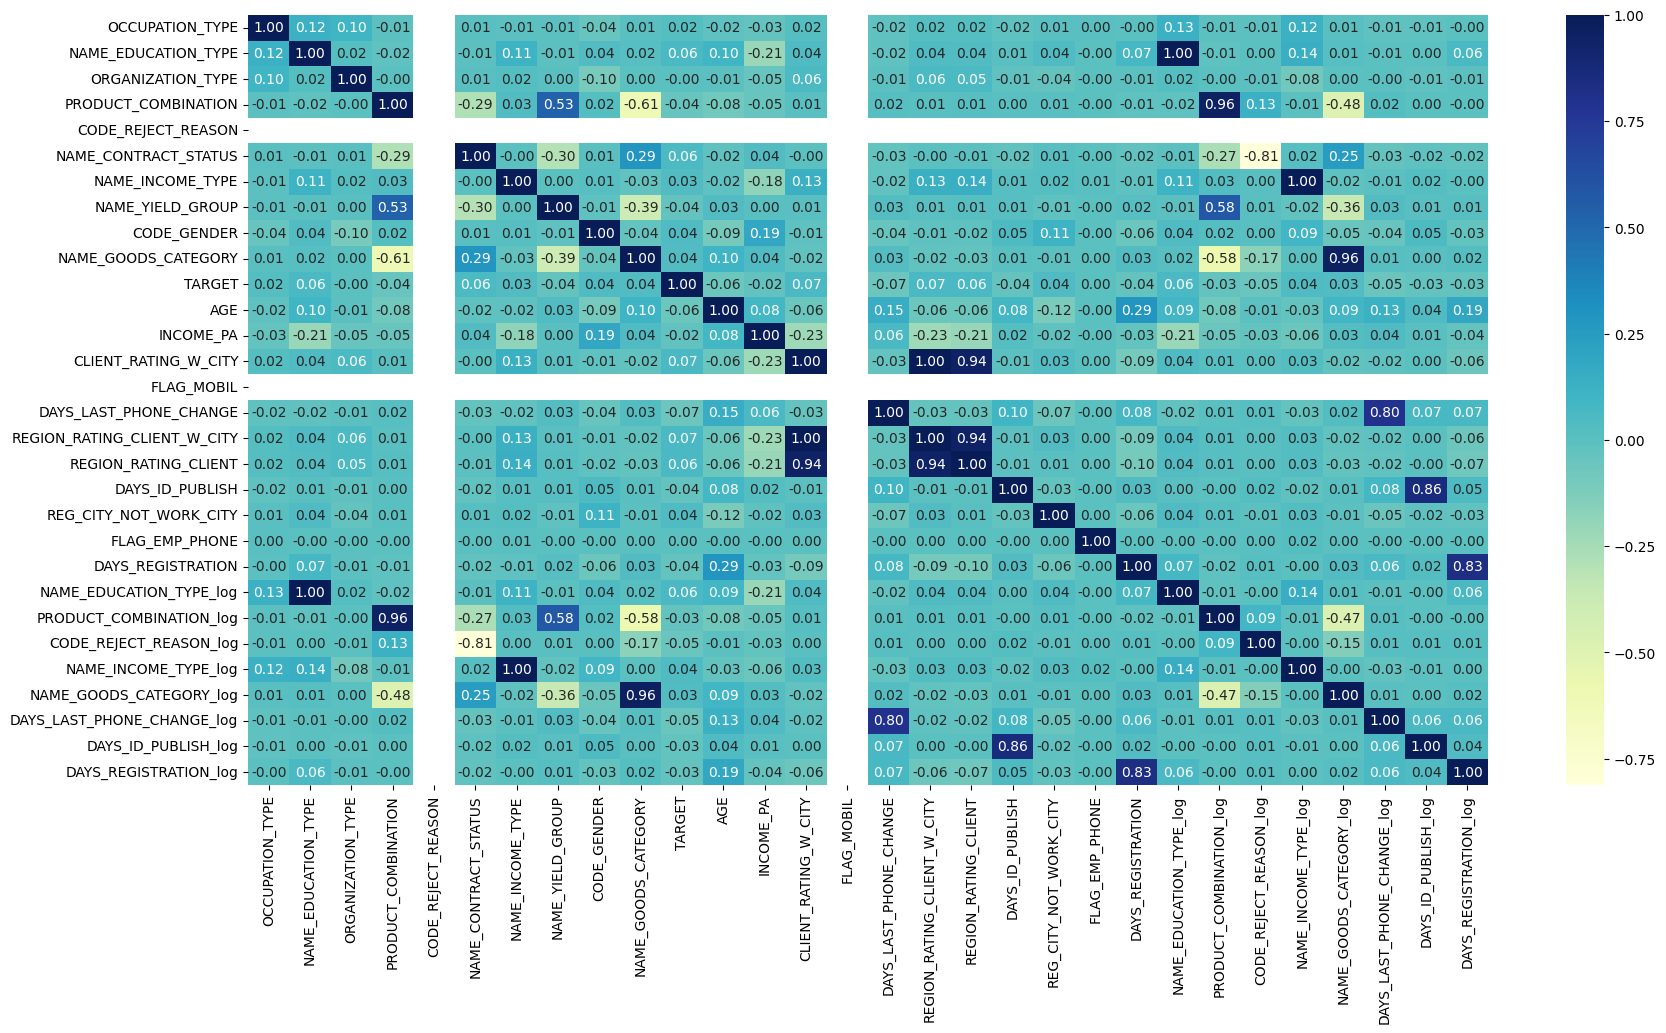

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

ddff = df_2[['OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE', 'ORGANIZATION_TYPE',
       'PRODUCT_COMBINATION', 'CODE_REJECT_REASON', 'NAME_CONTRACT_STATUS',
       'NAME_INCOME_TYPE', 'NAME_YIELD_GROUP', 'CODE_GENDER',
       'NAME_GOODS_CATEGORY', 'TARGET', 'AGE', 'INCOME_PA',
       'CLIENT_RATING_W_CITY','FLAG_MOBIL',
       'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY',
       'FLAG_EMP_PHONE', 'DAYS_REGISTRATION', 'NAME_EDUCATION_TYPE_log',
       'PRODUCT_COMBINATION_log', 'CODE_REJECT_REASON_log',
       'NAME_INCOME_TYPE_log', 'NAME_GOODS_CATEGORY_log',
       'DAYS_LAST_PHONE_CHANGE_log', 'DAYS_ID_PUBLISH_log',
       'DAYS_REGISTRATION_log']]

# Calculate the correlation matrix
corr = ddff.corr()

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, fmt=".2f",cmap="YlGnBu")
plt.show()

# Split train and test data

In [68]:
final_data = df_2[['TARGET','OCCUPATION_TYPE','NAME_EDUCATION_TYPE',
                   'NAME_INCOME_TYPE','INCOME_PA','CODE_REJECT_REASON',
                   'NAME_CONTRACT_STATUS','NAME_YIELD_GROUP',
                    'CODE_GENDER','AGE','CLIENT_RATING_W_CITY',
                    'DAYS_LAST_PHONE_CHANGE_log', 'DAYS_ID_PUBLISH_log',
                    'DAYS_REGISTRATION_log']]

###  Avoid to high correlation, indicating potential multicollinearity issues

#####  NAME_CONTRACT_STATUS and CODE_REJECT_REASON REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY FLAG_MOBIL and DAYS_LAST_PHONE_CHANGE DAYS_ID_PUBLISH and REG_CITY_NOT_WORK_CITY

In [69]:
final_data

,TARGET,OCCUPATION_TYPE,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,INCOME_PA,CODE_REJECT_REASON,NAME_CONTRACT_STATUS,NAME_YIELD_GROUP,CODE_GENDER,AGE,CLIENT_RATING_W_CITY,DAYS_LAST_PHONE_CHANGE_log,DAYS_ID_PUBLISH_log,DAYS_REGISTRATION_log
0,1,8,4,5,2430000.0,7,0,3,1,25,2,7.033506,7.659171,8.201934
1,0,3,1,3,3240000.0,7,0,3,0,45,1,6.719013,5.673323,7.078342
2,0,3,1,3,3240000.0,7,0,4,0,45,1,6.719013,5.673323,7.078342
3,0,3,1,3,3240000.0,7,0,4,0,45,1,6.719013,5.673323,7.078342
4,0,8,4,5,810000.0,7,0,4,1,52,2,6.703188,7.836370,8.357024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956116,0,8,1,0,1890000.0,7,0,4,0,46,1,6.668228,6.016157,8.542471
956117,0,8,1,0,1890000.0,7,2,0,0,46,1,6.668228,6.016157,8.542471
956118,0,8,1,0,1890000.0,7,2,3,0,46,1,6.668228,6.016157,8.542471
956119,0,8,1,0,1890000.0,7,0,3,0,46,1,6.668228,6.016157,8.542471


In [70]:
final_data['TARGET'].value_counts()

TARGET
0    865635
1     90486
Name: count, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split


from imblearn.over_sampling import RandomOverSampler

ro = RandomOverSampler(random_state= 46)

features = final_data.drop('TARGET',axis=1)
target = final_data['TARGET']

re_data, re_tar = ro.fit_resample(features, target)
re_data['TARGET'] = re_tar 

val = re_data.drop('TARGET', axis=1)
tar = re_data['TARGET']

X_train, X_test, y_train, y_test  = train_test_split(val, tar, test_size= 0.2, random_state=46)

X_train = X_train.clip(lower=-1e10, upper=1e10)
X_test = X_test.clip(lower=-1e10, upper=1e10)


print("Training data shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

print("Testing data shapes:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

Training data shapes:
X_train: (1385016, 13)
y_train: (1385016,)
Testing data shapes:
X_test: (346254, 13)
y_test: (346254,)


In [72]:
re_data['TARGET'].value_counts()

TARGET
1    865635
0    865635
Name: count, dtype: int64

In [73]:
re_data.shape

(1731270, 14)

### KNeighborsClassifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

scaler0 = StandardScaler()
X1_train_scaled = scaler0.fit_transform(X_train)
X1_test_scaled = scaler0.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=9)

# Fit the classifier
knn.fit(X1_train_scaled, y_train)

# Predict the labels
y_pred = knn.predict(X1_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.8622398586009115
Confusion Matrix:
[[130294  42934]
 [  4766 168260]]


In [75]:
y_pred.shape

(346254,)

Confusion Matrix:
[[130294  42934]
 [  4766 168260]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.75      0.85    173228
           1       0.80      0.97      0.88    173026

    accuracy                           0.86    346254
   macro avg       0.88      0.86      0.86    346254
weighted avg       0.88      0.86      0.86    346254



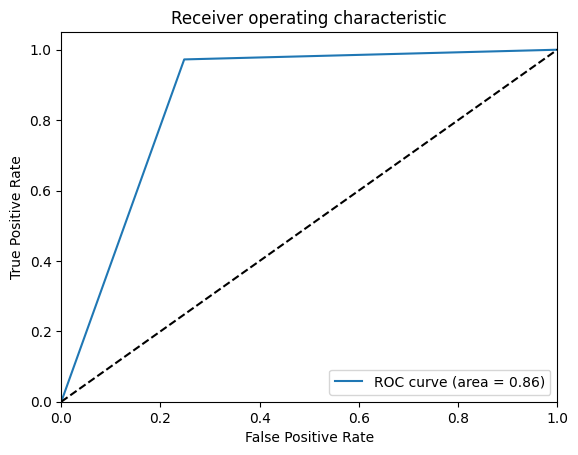

In [76]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
false, true, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false, true)
plt.plot(false, true, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### DecisionTree Classifier

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler


scaler1 = StandardScaler()
X1_train_scaled = scaler1.fit_transform(X_train)
X1_test_scaled = scaler1.transform(X_test)

Decison_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=30,
    min_samples_split=6,
    min_samples_leaf=6
)

# Fit the classifier
Decison_tree.fit(X1_train_scaled, y_train)

# Predict the labels
y_pred = Decison_tree.predict(X1_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.8568247587031486
Confusion Matrix:
[[136787  36441]
 [ 13134 159892]]


Confusion Matrix:
[[136787  36441]
 [ 13134 159892]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.79      0.85    173228
           1       0.81      0.92      0.87    173026

    accuracy                           0.86    346254
   macro avg       0.86      0.86      0.86    346254
weighted avg       0.86      0.86      0.86    346254



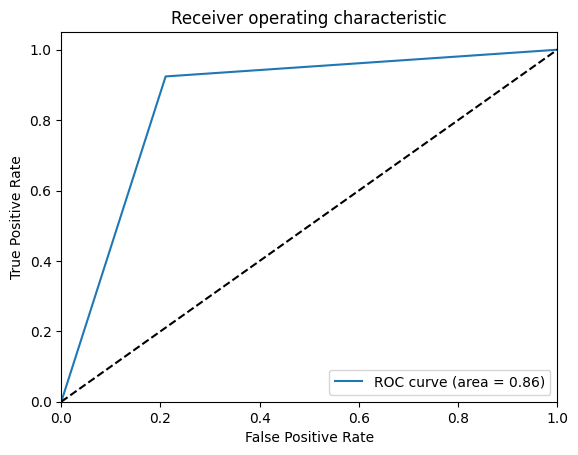

In [78]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
false, true, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false, true)
plt.plot(false, true, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')                                           #  DECISON TREE
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### RandomForest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier    # random forest
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
X1_train_scaled = scaler2.fit_transform(X_train)
X1_test_scaled = scaler2.transform(X_test)

random_forest = RandomForestClassifier(
    n_estimators=350,
    max_depth=20,
    min_samples_split=16,
    min_samples_leaf=9,
    criterion='gini',
    max_features='sqrt'
)

# Fit
random_forest.fit(X1_train_scaled, y_train)

# Predict
y_pred_rf = random_forest.predict(X1_test_scaled)

# Evaluate the classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf}")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(f"Confusion Matrix:\n{cm_rf}")

Accuracy: 0.7784920896220694
Confusion Matrix:
[[127820  45408]
 [ 31290 141736]]


Confusion Matrix:
[[136787  36441]
 [ 13134 159892]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.79      0.85    173228
           1       0.81      0.92      0.87    173026

    accuracy                           0.86    346254
   macro avg       0.86      0.86      0.86    346254
weighted avg       0.86      0.86      0.86    346254



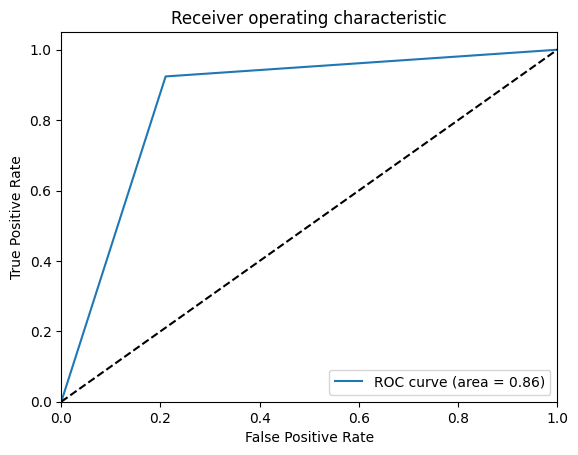

In [80]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
false, true, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false, true)
plt.plot(false, true, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### XGB Classifier

In [81]:
from xgboost import XGBClassifier   # xgb
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

scaler3 = StandardScaler()
X1_train_scaled = scaler3.fit_transform(X_train)
X1_test_scaled = scaler3.transform(X_test)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',
                    n_estimators=750,
                    max_depth=9,
                    learning_rate=0.5,
                    subsample=0.9,
                    colsample_bytree=0.9)

# Fit
xgb.fit(X1_train_scaled, y_train)

# Predict
y_pred = xgb.predict(X1_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

e:\project\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:01:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9838240135854026
Confusion Matrix:
[[168694   4534]
 [  1067 171959]]


Confusion Matrix:
[[168694   4534]
 [  1067 171959]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    173228
           1       0.97      0.99      0.98    173026

    accuracy                           0.98    346254
   macro avg       0.98      0.98      0.98    346254
weighted avg       0.98      0.98      0.98    346254



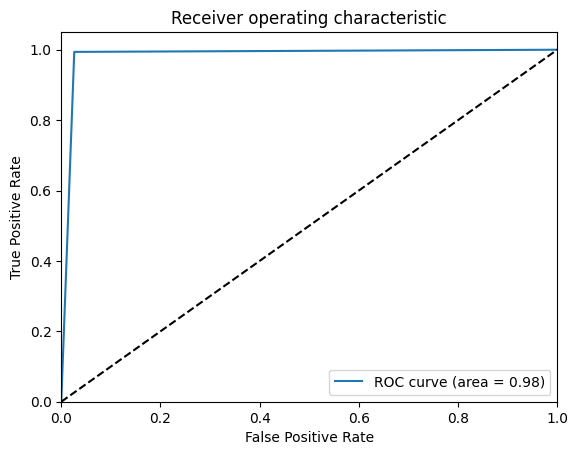

In [82]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

false, true, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false, true)
plt.plot(false, true, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [83]:
final_data['TARGET'].value_counts()

TARGET
0    865635
1     90486
Name: count, dtype: int64

In [84]:
final_data.columns

Index(['TARGET', 'OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE',
       'INCOME_PA', 'CODE_REJECT_REASON', 'NAME_CONTRACT_STATUS',
       'NAME_YIELD_GROUP', 'CODE_GENDER', 'AGE', 'CLIENT_RATING_W_CITY',
       'DAYS_LAST_PHONE_CHANGE_log', 'DAYS_ID_PUBLISH_log',
       'DAYS_REGISTRATION_log'],
      dtype='object')

In [85]:
sample = np.array([[8,4,5,2430000,7,0,3,1,25,2,np.log(1134.0),np.log(2120),np.log(3648.0)]])
pred = xgb.predict(sample)
if pred==1:
    print('The status is: Wont Repay')
else:
    print('The status is: Repay')

The status is: Wont Repay


In [86]:
pred

array([1])

In [87]:
# Saving the model
import pickle
with open('knnmodel_1.pkl', 'wb') as file:
    pickle.dump(knn, file)


with open('dtmodel_1.pkl', 'wb') as file:
    pickle.dump(Decison_tree, file)

with open('rfmodel_1.pkl', 'wb') as file:
    pickle.dump(random_forest, file)

with open('xgbmodel_1.pkl', 'wb') as file:
    pickle.dump(xgb, file)

In [88]:
import pickle
with open('xgbmodel_1.pkl', 'wb') as file:
    pickle.dump(xgb, file)